<a href="https://colab.research.google.com/github/yakaboskic/ENGS_108_Fall_2020/blob/master/solutions/assign_4_ENGS_108_Fall_2020_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGS 108 Fall 2020 Assignment 4**

*Due October 21, 2020 at 11:59PM on Canvas*

**Instructors:** George Cybenko

**TAs:** Chase Yakaboski


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in 
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)
  *   [tensorflow](https://www.tensorflow.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---

In [1]:
''' Import Statements '''
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import copy
import pickle
import tqdm

## **Data Loading**

In [2]:
dataset_base_path = '/content/sample_data'

#TODO: Set your base datasets path. This is my base path, you will need to change to match yours. 
dataset_github_path = '/content/drive/My Drive/git/ENGS_108_Fall_2020/datasets'

In [3]:
#-- Load circles dataset, format is X, y where X is a 2 dimensional coordinate and y is the label.
with open(os.path.join(dataset_github_path, 'circles.pk'), 'rb') as f_:
  circles = pickle.load(f_)

## **Problem 1: Support Vector Machines**
In this problem, you will be building a support vector machines to for both regression and classification tasks.
>
> **Part 1** In this part we will be exploring the *circles* dataset. In this dataset you will have an $X$ array of 2 dimensional samples of the form $(x_1, x_2)$ and a $y$ array of each samples associated label. 
>> **(a)** Go through the circles dataset and create a scatterplot of the circles data using the y label of each samples color to designate their respective class.

In [5]:
X, y = circles
#TODO: Your code goes here.

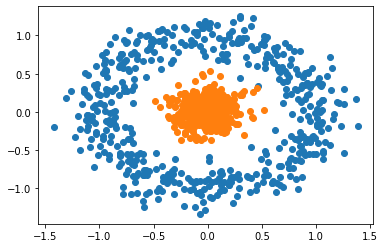

In [6]:
X_class_0 = np.squeeze(X[np.argwhere(y==0), :], axis=1)
X_class_1 = np.squeeze(X[np.argwhere(y==1), :], axis=1)
fig, ax = plt.subplots()
ax.scatter(X_class_0[:,0], X_class_0[:,1])
ax.scatter(X_class_1[:,0], X_class_1[:,1])

>> **(b)** Is this dataset linearly seperable? Explain why or why not?

**TODO:** Your answer should go here.

**Answer:** The dataset is not linearly seperable, because the classes can not be seperate by a 2 dimensional linear boundary.

>> **(c)** Can you think of a transformation of the dataset that could make the dataset linearly seperable? If so, define what these transformation function(s) might look like, and if not explain why. *Hint: Think of a higher dimensional space.*

**TODO:** Your answer should go here.

**Answer1:** Yes, you can transform this dataset by embedding it into a 3 dimensional feature space where these new features are:
$$f_1 = x_1^2$$
$$f_2 = x_2^2$$
$$f_3 = \sqrt{2}x_1x_2$$

**Answer2:** Yes, you can transform this dataset by embedding it into a 3 dimensional feature space where these new features are:
$$f_1 = x_1$$
$$f_2 = x_2$$
$$f_3 = x_1 ^2 + x^2_2$$

>> **(d)** If you where able to find a transformation in (c), create a suitable graph showing the dataset is linearly seperable in this new feature space.

In [7]:
#TODO: Your code goes here.

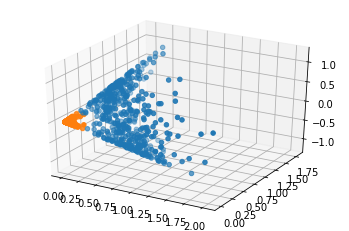

In [8]:
f_1 = X[:,0]**2
f_2 = X[:,1]**2
f_3 = np.sqrt(2) * X[:,0] * X[:,1]

#-- Seperate them out for graphing
f_1_class_0 = f_1[np.argwhere(y==0)]
f_2_class_0 = f_2[np.argwhere(y==0)]
f_3_class_0 = f_3[np.argwhere(y==0)]
f_1_class_1 = f_1[np.argwhere(y==1)]
f_2_class_1 = f_2[np.argwhere(y==1)]
f_3_class_1 = f_3[np.argwhere(y==1)]

#-- Make Graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(f_1_class_0, f_2_class_0, f_3_class_0)
ax.scatter(f_1_class_1, f_2_class_1, f_3_class_1)

# The data may not be 100% linearly seperable but I think it's something like 99.9%. Close enough.

The classes can now be seperated by a 2 dimensional plane.

> **Part 2** What we accomplished in Part 1 is known as the kernel trick for SVMs. Now let's focus on how we can use this idea to accomplish non-linear classification on a real world dataset. In this next part and throughout the remainder of the assignment we will be using a food image dataset. These images are RGB images of many pixels. 
>> **(a)** You have been given a number of code skeletons throughout the course all of which load and preprocess the data for you. In this excerise tho, we will be doing the data loading manually as it is an important skill to learn. Write some code that will walk through the *ExampleFoodImageDataset* directory structure and build a single large numpy array with all image features flattened into a large vector (Make sure to resize the image to something like (28, 28) or (32, 32), etc.) the first column being a integer id for the class. *Hint: You have been provided with a basic skeleton, study the operations of the code and finish the script.*

In [9]:
from PIL import Image

#-- The dimensions of the resized image
RESIZE = (28,28)
#-- A map from integer ids to food categories (strings)
food_map = {}
#-- The data list that we will be filling in.
data = []
#-- The folder that the food images are in
folder = os.path.join(dataset_github_path, 'ExampleFoodImageDataset')

#-- Let's start our for loop (Just using tqdm to give us a pretty progress bar).
for idx, subfold in enumerate(tqdm.tqdm(os.listdir(folder), desc='Processing images', leave=False)):                                                                             
  if os.path.isdir(os.path.join(folder, subfold)):
    #-- We have found image class folder so let's extract all example data
    map_[idx] = subfold
    for img_name in os.listdir(os.path.join(folder, subfold)):
      #-- Make sure the file is an image
      if img_name.endswith('.jpg'):
        #TODO: You do this part. Use the Image class from PIL to load the image and cast it into a np array.
        #TODO: Then make sure to resize the image (otherwise things will take awhile)

data = np.array(data)

IndentationError: ignored

In [11]:
from PIL import Image

#-- Resize dimensions (DON'T FORGET TO RESIZE THE IMAGE)
RESIZE = (28,28)
#-- A map from integer ids to food categories (strings)
food_map = {}
#-- The data list that we will be filling in.
data = []
#-- The folder that the food images are in
folder = os.path.join(dataset_github_path, 'ExampleFoodImageDataset')

#-- Let's start our for loop (Just using tqdm to give us a pretty progress bar).
for idx, subfold in enumerate(tqdm.tqdm(os.listdir(folder), desc='Processing images', leave=False)):                                                                             
  if os.path.isdir(os.path.join(folder, subfold)):
    #-- We have found image class folder so let's extract all example data
    food_map[idx] = subfold
    for img_name in os.listdir(os.path.join(folder, subfold)):
      #-- Make sure the file is an image
      if img_name.endswith('.jpg'):
        #TODO: You do this part. Use the Image class from PIL to load the image and cast into a np array.
        img_path = os.path.join(folder, subfold, img_name)
        img_array = np.array(Image.open(img_path).resize(RESIZE))
        img_array = img_array.flatten()
        img_array = np.insert(img_array, 0, idx)
        data.append(img_array)

data = np.array(data)

>> **(b)** Split your dataset into training and testing sets with an 80/20 split. *Hint: Look at Sklearn's train_test_split function.* Then implement a SVM classifer and report your accuracy on the testing dataset.

In [ ]:
#TODO: Your code goes here.

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = data[:,1:]
y = data[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

In [13]:
svcModel = SVC()
svcModel.fit(X_train, y_train)
print('Model accuracy: {}'.format(svcModel.score(X_test, y_test)))

Model accuracy: 0.47959183673469385


>> **(c)** Choose a 2 hyperparameters to study and experiment with. Can you make an SVM that has better accuracy then just using the defaults?

In [ ]:
#TODO: Your code goes here.

In [14]:
# Possible solution: Check to make sure students met requirements.
res = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  for C in np.linspace(.2, 3, num=4):
    model_ = SVC(C=C, kernel=kernel)
    model_.fit(X_train, y_train)
    res.append((model_.score(X_test, y_test), kernel, C))
print(res)

[(0.42857142857142855, 'linear', 0.2), (0.42857142857142855, 'linear', 1.1333333333333333), (0.42857142857142855, 'linear', 2.0666666666666664), (0.42857142857142855, 'linear', 3.0), (0.5, 'poly', 0.2), (0.5204081632653061, 'poly', 1.1333333333333333), (0.5255102040816326, 'poly', 2.0666666666666664), (0.5306122448979592, 'poly', 3.0), (0.336734693877551, 'rbf', 0.2), (0.49489795918367346, 'rbf', 1.1333333333333333), (0.5408163265306123, 'rbf', 2.0666666666666664), (0.5510204081632653, 'rbf', 3.0), (0.2755102040816326, 'sigmoid', 0.2), (0.27040816326530615, 'sigmoid', 1.1333333333333333), (0.23979591836734693, 'sigmoid', 2.0666666666666664), (0.23979591836734693, 'sigmoid', 3.0)]


## **Problem 2: Introduction to TensorFlow**
In this problem, we will start working in tensorflow to build deep learning systems starting with fully connected neural networks. We will focus on using the food image dataset we built in the last problem.
>
> **(a)** Using the food image dataset we built in the last problem, build a [tensorflow Data Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) that is shuffled with a batch size of 10. *Hint: We did this in class.*

In [ ]:
#TODO: Your code goes here.

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [16]:
BATCH_SIZE = 10
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

> **(b)** Build a two layer fully connected neural network of any size with a ReLu activation function and a final softmax layer.

In [ ]:
#TODO: Your code goes here.

In [17]:
# Possible solution. Number of units may differ.
fc = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(9)
    ]
)

> **(c)** Compile your model with an appropriate loss function and optimizer. Briefly describe your choices.

In [ ]:
#TODO: Your code goes here.

In [18]:
# Possible solution: Choice of optimizer may differ.
fc.compile(optimizer=tf.keras.optimizers.Adam(),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

> **(d)** Train your model on the food image training dataset. And report your accuracy on the testing dataset.

In [ ]:
#TODO: Your code goes here.

In [19]:
# May train for more or less than 30 epochs.
fc.fit(train_dataset, epochs=30)
fc.evaluate(test_dataset)

Epoch 1/30
79/79 [==============================] - 0s 2ms/step - loss: 68.4832 - sparse_categorical_accuracy: 0.2506
Epoch 2/30
79/79 [==============================] - 0s 3ms/step - loss: 26.4322 - sparse_categorical_accuracy: 0.2903
Epoch 3/30
79/79 [==============================] - 0s 2ms/step - loss: 18.3683 - sparse_categorical_accuracy: 0.3312
Epoch 4/30
79/79 [==============================] - 0s 2ms/step - loss: 18.9089 - sparse_categorical_accuracy: 0.2903
Epoch 5/30
79/79 [==============================] - 0s 2ms/step - loss: 10.3001 - sparse_categorical_accuracy: 0.3798
Epoch 6/30
79/79 [==============================] - 0s 2ms/step - loss: 13.1108 - sparse_categorical_accuracy: 0.3632
Epoch 7/30
79/79 [==============================] - 0s 2ms/step - loss: 7.5736 - sparse_categorical_accuracy: 0.4092
Epoch 8/30
79/79 [==============================] - 0s 2ms/step - loss: 7.6172 - sparse_categorical_accuracy: 0.3529
Epoch 9/30
79/79 [==============================] - 0s 3ms

[1.8481301069259644, 0.27551019191741943]

> **(e)** Now try to tune this network by varying the number of layers, units, activations and see if you can outperform the network in part (d). Does your best model perform better or worse than the SVM in problem 1?

In [ ]:
# Make sure they met the requirements of the question.

> **(BONUS)** We lost a lot of information when we resized the images in part (a). What would happen if we didn't resize the images and we built fit the neural network with all this other information? Try it out! *Hint: Runtime will be much longer, both to create the image dataset without resizing and to train the model, so you might have to get the code working and then just let it run.*

In [ ]:
# If they implemented a padding strategy (+10)
# If they implemented a strategy were they reduced all images to the size of the smallest image in the set (+5)
# Other strategies, grader should use they're judgement. max: +10.